In [219]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
#from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [220]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [221]:
data = pd.read_csv('AMD.csv')


In [222]:
data

,ticker,date,open,high,low,close
0,AMD,1980-03-17,0.00,3.30,3.12,3.15
1,AMD,1980-03-18,0.00,3.12,2.94,3.03
2,AMD,1980-03-19,0.00,3.08,3.02,3.04
3,AMD,1980-03-20,0.00,3.06,3.01,3.01
4,AMD,1980-03-21,0.00,3.02,2.91,2.92
...,...,...,...,...,...,...
10860,AMD,2023-04-13,92.79,93.16,91.83,92.09
10861,AMD,2023-04-14,91.82,92.97,90.50,91.75
10862,AMD,2023-04-17,90.23,90.69,88.30,89.87
10863,AMD,2023-04-18,91.61,92.16,89.33,89.78


In [223]:
data = data.filter(['close'])


In [224]:
# Lấy 100 dòng cuối cùng của df
data = data.tail(1000)
data

,close
9865,26.81
9866,28.29
9867,28.22
9868,27.42
9869,26.66
...,...
10860,92.09
10861,91.75
10862,89.87
10863,89.78


In [225]:
#Tiền xử lý
data.fillna(0, inplace=True)

# Normalize data
scaler = MinMaxScaler()
dataScale = scaler.fit_transform(data.values.reshape(-1,1))

In [226]:
# Hàm tính giá trị alpha tối ưu
def optimum_alpha(X):
    X_max = np.max(X)
    X_min = np.min(X)
    n = len(X)
    return ((X_max - X_min) - (1/n) * np.sum(X)) / (X_max - X_min)


In [227]:
def smoothed(X, alpha):
    S = np.zeros_like(X)
    S[0] = X[0]
    for i in range(1, len(X)):
        S[i] = S[i-1] + alpha*(X[i] - S[i-1])
    return S

In [228]:
alpha = optimum_alpha(dataScale)


In [229]:
S = smoothed(dataScale, alpha)
print("Giá trị alpha tối ưu:", alpha)
print("Chuỗi ban đầu:", dataScale)
print("Chuỗi đã được làm mịn:", S)


Giá trị alpha tối ưu: 0.6285349745706493
Chuỗi ban đầu: [[4.20137097e-03]
 [1.51101939e-02]
 [1.45942360e-02]
 [8.69757500e-03]
 [3.09574703e-03]
 [6.26520233e-03]
 [7.14970148e-03]
 [1.26778212e-02]
 [0.00000000e+00]
 [7.96049237e-03]
 [9.87690720e-03]
 [1.30463625e-02]
 [9.28724110e-03]
 [3.24316356e-03]
 [8.18161716e-03]
 [8.62386674e-03]
 [8.84499152e-04]
 [1.47416525e-03]
 [2.07120218e-02]
 [1.36360286e-02]
 [1.31937790e-02]
 [8.62386674e-03]
 [9.87690720e-03]
 [2.45448515e-02]
 [2.40288936e-02]
 [4.11292106e-02]
 [4.54779981e-02]
 [5.15220756e-02]
 [4.54779981e-02]
 [4.37827080e-02]
 [3.79597553e-02]
 [3.03678042e-02]
 [2.18176458e-02]
 [3.10311786e-02]
 [3.13997199e-02]
 [2.77880150e-02]
 [2.10805631e-02]
 [2.22598953e-02]
 [1.93115648e-02]
 [2.71246407e-02]
 [3.31687182e-02]
 [3.04415125e-02]
 [3.65592983e-02]
 [3.68541313e-02]
 [3.64855900e-02]
 [3.87705462e-02]
 [4.27507924e-02]
 [5.09324095e-02]
 [5.56497383e-02]
 [5.02690352e-02]
 [5.13746591e-02]
 [6.00722341e-02]
 [5.6091

D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Smooth')

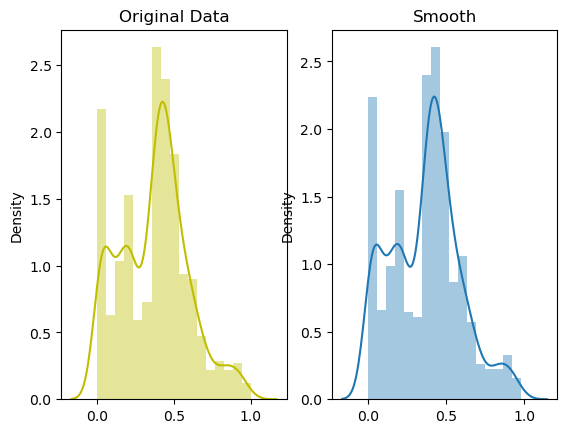

In [230]:
import seaborn as sns

fig, ax=plt.subplots(1,2)
sns.distplot(dataScale, ax=ax[0], color='y')
ax[0].set_title("Original Data")


sns.distplot(S,ax=ax[1])
ax[1].set_title("Smooth")


In [231]:
#Chia dữ liệu thành train test
data = pd.DataFrame(S)

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [232]:

data = train_data

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [233]:
#Chuẩn bị dữ liệu để đưa vào mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
          
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


size_window = 7
size_predict = 1
stepWindow = 1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)

In [234]:
start_time = time.time()

# Tạo một list chứa các số Lucas để sử dụng làm số lượng hidden layer
lucas_list = [3, 4, 7, 11, 18, 29, 47, 76]

# Chọn số lượng hidden layer sử dụng theo số Lucas
num_hidden_layer = lucas_list[3] # ví dụ chọn số 11

In [235]:

# Tạo mô hình CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(size_window, 1)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
for i in range(num_hidden_layer): #Thêm num_hidden_layer lớp ẩn với 64 đơn vị mỗi lớp
    model.add(Dense(units=100, activation='relu')) #Tham số chỉ định số lượng tế bào thần kinh trong lớp
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

# Compile mô hình với Adam optimizer và Mean Squared Error loss
model.compile(loss='mse', optimizer='adam')


In [236]:
history = model.fit(X_train, y_train, epochs=8000, batch_size=8)

Epoch 1/80
79/79 [==============================] - 18s 7ms/step - loss: 0.1083
Epoch 2/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0773
Epoch 3/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0589
Epoch 4/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0487
Epoch 5/80
79/79 [==============================] - 1s 8ms/step - loss: 0.0435
Epoch 6/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0412
Epoch 7/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0402
Epoch 8/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0400
Epoch 9/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0398
Epoch 10/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0398
Epoch 11/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0398
Epoch 12/80
79/79 [==============================] - 1s 7ms/step - loss: 0.0397
Epoch 13/80
79/79 [=============================

In [237]:
y_pred = model.predict(X_test)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

5/5 [==============================] - 1s 4ms/step
Training time: 64.32571148872375 seconds


In [238]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, (-1, 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAPE: ', mape)

5/5 [==============================] - 0s 4ms/step
MSE:  0.14912288954560515
RMSE:  0.3861643297167738
MAPE:  0.5186035438876666


In [239]:
len(data)

800